# Anti-Cancer Drug Activity Prediction


#### - Define the problem. What is the input? What is the output? What data mining function is required? What could be the challenges? What is the impact? What is an ideal solution?
ans 
- this anti cancer drug activity prediction, we deal with chemical compositions (sdf file ),The difficulty is centered on dealing with the data and also understanding it. It was the most difficult problem that I faced. I needed more time to research and deal with the data, as well as addressing it, addressing the data imbalance and building the model.
-input is Chemical composition of the treatment.
- output if the cencer is Drug Activity  or not (label of graph)
- it's Anti-Cancer Drug Activity Prediction(classifiction problems)
-If we can get a good model I feel it is great to help the patients and the medical world so I feel I need to do more work and try to get a better level of dealing with these problems.I will try to deal with the matter now by trying to change the parameters and hyperparameters to get good results and also deal with imbalance data.



## Read SDF format data (structured-data format)

In [ ]:
import numpy as np
from tqdm.notebook import tqdm
# function for read sdf
def read_sdf(file):
  # open file for read
    with open(file, 'r') as rf:
      # split the content by $$$
        content = rf.read()
    samples = content.split('$$$$')
    #function for parse the sample to nodes, links  and lines
    def parse_sample(s):
      #Split a string into a list where each line is a list item
        lines = s.splitlines()
        links = []
        nodes = []
        label = 0
        #loop in every each line and specified the labels, nodes and edges
        for l in lines:
 #split data to 2 category when l =1.0 will label be 1 and when l=-1.0 label will be 0
            if l.strip() == '1.0':
                label = 1
            if l.strip() == '-1.0':
                label = 0
            if l.startswith('    '):
                feature = l.split()
                #nnode = third feature
                node = feature[3]
                #append the nodes
                nodes.append(node)
            elif l.startswith(' '):
                lnk = l.split()
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    links.append((
                        int(lnk[0])-1,  # (-1)-based index
                        int(lnk[1])-1, # zero-based index
                        # int(lnk[2]) ignore edge weight
                    ))
        return nodes, np.array(links), label
    # we used tqdm to skip unnecessary iteration displays, which allows for a negligible overhead in most cases.
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]
                
        
        

In [ ]:
from sklearn.model_selection import train_test_split
# load read sdf
training_set = read_sdf('train.sdf')
#split data to train and validation
training_set, validation_set = train_test_split(training_set, test_size=0.15,)

  0%|          | 0/1572 [00:00<?, ?it/s]

In [ ]:
# load the test data
testing_set  = read_sdf('test.sdf')

  0%|          | 0/2136 [00:00<?, ?it/s]

In [ ]:
#print second sample for training_set 
print(training_set[1])

(['S', 'O', 'O', 'O', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], array([[ 0,  2],
       [ 0,  3],
       [ 0,  6],
       [ 0, 17],
       [ 1,  4],
       [ 4, 10],
       [ 4, 11],
       [ 5,  6],
       [ 5, 12],
       [ 7,  8],
       [ 7,  9],
       [ 7, 12],
       [ 8, 10],
       [ 8, 13],
       [ 9, 11],
       [ 9, 14],
       [10, 15],
       [11, 16],
       [13, 18],
       [14, 19],
       [15, 20],
       [16, 21],
       [17, 22],
       [17, 23],
       [18, 20],
       [19, 21],
       [22, 25],
       [23, 26],
       [24, 25],
       [24, 26],
       [24, 27]]), 0)


In [ ]:
# print first sample in training_set we get array have 3 columns 1 represent  node and second represent links and third represent labels
training_set[0]

(['Br', 'Br', 'S', 'O', 'O', 'C', 'C', 'C', 'C'], array([[0, 7],
        [1, 8],
        [2, 3],
        [2, 4],
        [2, 5],
        [2, 6],
        [5, 7],
        [6, 8]]), 0)

In [ ]:
training_set

[(['Br', 'Br', 'S', 'O', 'O', 'C', 'C', 'C', 'C'], array([[0, 7],
         [1, 8],
         [2, 3],
         [2, 4],
         [2, 5],
         [2, 6],
         [5, 7],
         [6, 8]]), 0),
 (['S',
   'O',
   'O',
   'O',
   'N',
   'N',
   'N',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C'],
  array([[ 0,  2],
         [ 0,  3],
         [ 0,  6],
         [ 0, 17],
         [ 1,  4],
         [ 4, 10],
         [ 4, 11],
         [ 5,  6],
         [ 5, 12],
         [ 7,  8],
         [ 7,  9],
         [ 7, 12],
         [ 8, 10],
         [ 8, 13],
         [ 9, 11],
         [ 9, 14],
         [10, 15],
         [11, 16],
         [13, 18],
         [14, 19],
         [15, 20],
         [16, 21],
         [17, 22],
         [17, 23],
         [18, 20],
         [19, 21],
         [22, 25],
         [23, 26],
         [24, 25],
         [24, 26],
         [24, 

In [ ]:
import pandas as pd
df=pd.DataFrame(training_set,columns=['node','edge','labels'])
df.head()

,node,edge,labels
0,"[Br, Br, S, O, O, C, C, C, C]","[[0, 7], [1, 8], [2, 3], [2, 4], [2, 5], [2, 6...",0
1,"[S, O, O, O, N, N, N, C, C, C, C, C, C, C, C, ...","[[0, 2], [0, 3], [0, 6], [0, 17], [1, 4], [4, ...",0
2,"[Br, Cl, O, O, O, O, C, C, C, C, C, C, C, C, C...","[[0, 16], [1, 8], [2, 7], [2, 10], [3, 10], [4...",0
3,"[I, S, P, O, O, O, O, O, C, C, C, C, C, C, C, ...","[[0, 3], [0, 8], [0, 13], [1, 3], [1, 6], [1, ...",0
4,"[O, O, O, O, O, O, C, C, C, C, C, C, C, C, C, ...","[[12, 0], [0, 25], [1, 19], [2, 23], [2, 27], ...",0


In [ ]:
#note we have Imbalanced data 1269 for  label 0 and 67 for 1
#get value count for labels 0,1
df['labels'].value_counts()

0    1269
1      67
Name: labels, dtype: int64

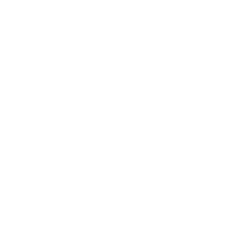

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Percentage for each category in label
lab = pd.DataFrame(df["labels"].value_counts(),columns=["label"])
plt.pie(lab["label"], labels=lab.index )
plt.show()

## Visualizing/Inspecting a Sample

In [ ]:
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
# representation in 3D colorspace
colors = cm.rainbow(np.linspace(0, 1, 50))

In [ ]:
def visualize(sample):
  #Create an empty graph with no nodes and no edges
    G=nx.Graph()
    #Define node and edge
    nodes = sample[0]
    edges = sample[1]
    # create empty dict for label and list foe node color
    labeldict={}
    node_color=[]
    for i,n in enumerate(nodes):
       #adding one edge at  for time
        G.add_node(i)
        labeldict[i]=n
        node_color.append(colors[hash(n)%len(colors)])

    # a list of nodes:
    for e in edges:
        G.add_edge(e[0], e[1])
        
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    
    return G

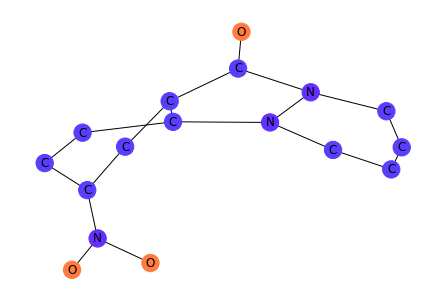

In [ ]:
#visualize sample used visulalize function
plt.clf()
visualize(training_set[10])

## Preprocessing:

In [ ]:
# Defining tokenizers
from tensorflow.keras.preprocessing.text import Tokenizer
# max for vocabry=500 and max of length =100
max_vocab = 500
max_len = 100


# build vocabulary from training set
all_nodes = [s[0] for s in training_set]
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [ ]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
random.seed(0)
# function transforms a list of length num_samples for sequences into a 2D Numpy array of shape 
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples]
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)
    sample_nodes = pad_sequences(sample_nodes, padding='post')
    max_nodes_len = np.shape(sample_nodes)[1]
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]
    edges = [e for e in edges if len(e) > 0]
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]
    
    all_nodes = np.reshape(sample_nodes, -1)
    all_edges = np.concatenate(edges)

    node_to_graph = np.reshape(node_to_graph, -1)
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples])


#Create a batch samples generator using this function 
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:
        dataset = list(dataset)
        if shuffle:
            random.shuffle(dataset)
        l = len(dataset)
        for ndx in range(0, l, batch_size):
            batch_samples = dataset[ndx:min(ndx + batch_size, l)]
            yield prepare_single_batch(batch_samples)
        if not repeat:
            break


In [ ]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items():
        print(k)
        print(v)
        pass
    print('label', train_batch[1])
    break

data
[ 5  2  2  2  2  2  2  2  2  3  3  3  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  0  0  5  5  3  3  3  3  3  3  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  4  3  3  3  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  7 33  5  2  2  3  3  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
edges
[[  0  23]
 [  1  12]
 [  1  16]
 [  2  12]
 [  2  19]
 [  3  14]
 [  4  15]
 [  5  18]
 [  5  20]
 [  6  17]
 [  7  20]
 [  8  11]
 [  9  13]
 [  9  17]
 [ 10  11]
 [ 10  17]
 [ 10  21]
 [ 12  13]
 [ 13  14]
 [ 14  15]
 [ 15  16]
 [ 16  18]
 [ 20  22]
 [ 21  23]
 [ 22  24]
 [ 24  25]
 [ 25  26]
 [ 26  27]
 [ 27  28]
 [ 28  29]
 [ 29  30]
 [ 30  31]
 [ 31  32]
 [ 32  33]
 [ 36  58]
 [ 37  59]
 [ 38  46]
 [ 38  50]
 [ 39  47]
 [ 39  51]
 [ 40  48]
 [ 40  60]
 [ 41  49]
 [ 41  61]
 [ 42  64]
 [ 42  66]
 [ 42  67]
 [ 43  65]
 [ 43  68]
 [ 43  69]


In [ ]:
from pandas.core import resample
# trail 3 solve imbalance data by upsample
x_traing=pd.DataFrame(np.array(training_set)[:,:-1])
y_training=pd.DataFrame(np.array(training_set)[:,2])
from sklearn.utils import resample
resampling=x_traing.copy()
resampling[2]=y_training.values
class0=resampling[resampling[2]==0]
class1=resampling[resampling[2]==1]
class1_af=resample(class1,replace=True,n_samples=1180)
df_upsample=pd.concat([class0,class1_af])
#disply new class count
df_upsample[2].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


0    1269
1    1180
Name: 2, dtype: int64

##### note:we have improve in dataset with classes with upsample in class 1
it was 67 now became 67.

In [ ]:
!pip install --quiet tf2_gnn

# implements a deep Graph Neural Network
from tf2_gnn.layers.gnn import GNN, GNNInput

     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 134 kB 51.0 MB/s 
     |████████████████████████████████| 346 kB 35.1 MB/s 
     |████████████████████████████████| 1.2 MB 49.1 MB/s 
     |████████████████████████████████| 462 kB 63.0 MB/s 
     |████████████████████████████████| 178 kB 53.6 MB/s 
     |████████████████████████████████| 3.6 MB 42.1 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 41 kB 511 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


In [ ]:
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam
#from model import GCNModel
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
#in trial2 Embedding(tokenizer.num_words, 30)(data)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1
#  defined input
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)


#defined the default hyperparameter 
params = GNN.get_default_hyperparameters()
# dimension for hidden layer =32 for trial1 and 48 for trail2
params["hidden_dim"] = 32
#trial 4
#params["num_layers"]=6
#trial5
#params["global_exchange_dropout_rate"]=0.4
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)


#Computes the mean along segments of a tensor.
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
#defined model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
#trial 6 LAGCN -->https://github.com/storyandwine/LAGCN/blob/master/code/model.py
'''LA-GCN can be mainly divided into three steps: 1) train a meta-learner with a given node and its
neighbors’ feature vectors; 2) get the mask for each neighbor from the meta-learner; 3) aggregate the neighbors
(after multiplying the corresponding mask) to get the central node’s new representation.'''
'''num_features = training_set[2][1]
features_nonzero = training_set[1].shape[0]
placeholders = {
        'features': tf.sparse_placeholder(tf.float32),
        'adj': tf.sparse_placeholder(tf.float32),
        'adj_orig': tf.sparse_placeholder(tf.float32),
        'dropout': tf.placeholder_with_default(0., shape=()),
        'adjdp': tf.placeholder_with_default(0., shape=())
    }
model = GCNModel(placeholders, num_features,features_nonzero, training_set.shape[0], name='LAGCN')
'''
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_5/StatefulPartitionedCall:0', description="created by layer 'gnn_5'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_5/SegmentMean:0', description="created by layer 'tf.math.segment_mean_5'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None,)]            0           []        

In [ ]:
print('gnn_out', gnn_out)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_3/StatefulPartitionedCall:0', description="created by layer 'gnn_3'")


In [ ]:
# compiler with BinaryCrossentropy and accuracy  metrics 
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [ ]:
import math
# define the parameters 
# in trial 1 batch_size =16 in trial 7 batch_size=30 and in trial8 batch_size=40
batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)
# train the model 
# in trial1 epochs=5 in trial epochs= 7 and in trail8 epochs=50 
model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_3_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_3_grad/Identity:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/cond_3_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgcn_2/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgcn_2/embedding_lookup_grad/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/rgcn_2/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor

84/84 [==============================] - 5s 21ms/step - loss: 0.4068 - auc: 0.4424 - val_loss: 0.2854 - val_auc: 0.2861
Epoch 2/5
84/84 [==============================] - 1s 15ms/step - loss: 0.2713 - auc: 0.4136 - val_loss: 0.2974 - val_auc: 0.2917
Epoch 3/5
84/84 [==============================] - 1s 16ms/step - loss: 0.2816 - auc: 0.3515 - val_loss: 0.2419 - val_auc: 0.2743
Epoch 4/5
84/84 [==============================] - 1s 15ms/step - loss: 0.2595 - auc: 0.3937 - val_loss: 0.2298 - val_auc: 0.2438
Epoch 5/5
84/84 [==============================] - 1s 15ms/step - loss: 0.2522 - auc: 0.3839 - val_loss: 0.2453 - val_auc: 0.4756


In [ ]:
#predict the test set
y_pred = model.predict(gen_batch(testing_set, batch_size=16, shuffle=False))
y_pred = np.reshape(y_pred, -1)

In [ ]:
len(y_pred)

2136

In [ ]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission.csv')

#### in trial1: just implament templete and understand it.
#### in trial2: change in paramters of GNN and used hidden_dim=25 and embedding with 30.
#### in trial3: try to solve imbalance data by used upsampling we made class 1= 1180 sample and modify the model to deal with it.
#### in trial4: change in paramters of GNN and used hidden_dim=25 and num_layers=6 with upsampling.
#### in trial5: change in paramters of GNN and used hidden_dim=5, num_layers=6 and global_exchange_dropout_rate=.4 with upsampling.
#### in trial6:I try to used LAGCN aggregation mechanisms but to deal with it I was have many problem and dowenload model file from the link in comment.
#### in trial7 used batch size for fit model=30 and epoch=7 with upsampling.
#### in trial8 used batch size for fit model=50 and epoch=40 with upsampling.
### in trial9 used batch size for fit model=50 and epoch=40 without upsampling.
-------------------------------------------------------------
I spent many hours learning some codes and trying to implement and understand the GCN aggregation mechanisms and read many papers but I couldn't get enough resources or to go into depth or even comprehensive knowledge of it was really very difficult and understandable. I felt so frustrated.